In [2]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

In [3]:
# pulling in data from Data folder and combining the uber data files into one dataframe.

root_dir = "Data"
file_set = set()
myFolder = "Data"
fileSet = set()
for root, dirs, files in os.walk(myFolder):
    for fileName in files:
        fileSet.add( os.path.join( root[len(myFolder):], fileName ))
sorted_set = sorted(fileSet)
file_list = list(sorted_set)
list_path = ['Data/' + file for file in file_list]
df_list = []
for file in list_path[2:]:
    temp = pd.read_csv(file)
    df_list.append(temp)
uber_raw_df = pd.concat(df_list)
weather_raw_df = pd.read_csv('Data/NewYorkWeatherData_2014_2015.csv')
uber_raw_df.head()

,Date/Time,Lat,Lon,Base,Unnamed: 0,Dispatching_base_num,Affiliated_base_num,locationID,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,NaN
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,NaN
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,NaN
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,NaN
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,NaN


In [4]:
# Convert Date/Time column to datetime object for conversion later
uber_raw_df['Date/Time'] = pd.to_datetime(uber_raw_df['Date/Time'])

# # create new 'Time' column converting the original datetime object into just time in the format 00:00:00
uber_raw_df['Time'] = uber_raw_df['Date/Time'].apply(lambda x: x.time().strftime("%H:%M:%S"))

# # # create new 'Date' column converting the original datetime object into just date in the format YYYY-MM-DD
uber_raw_df['Date'] = uber_raw_df['Date/Time'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

# Display head
uber_raw_df.head()

,Date/Time,Lat,Lon,Base,Unnamed: 0,Dispatching_base_num,Affiliated_base_num,locationID,Month,Time,Date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,NaN,NaN,NaN,NaN,NaN,00:11:00,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,NaN,NaN,NaN,NaN,NaN,00:17:00,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,NaN,NaN,NaN,NaN,NaN,00:21:00,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,NaN,NaN,NaN,NaN,NaN,00:28:00,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,NaN,NaN,NaN,NaN,NaN,00:33:00,2014-04-01


In [5]:
uber_raw_df=uber_raw_df[['Date/Time', 'Time', 'Date', 'Lat']]

uber_raw_df[['Lat']] = uber_raw_df[['Lat']].fillna(value = 0)

uber_raw_df

,Date/Time,Time,Date,Lat
0,2014-04-01 00:11:00,00:11:00,2014-04-01,40.7690
1,2014-04-01 00:17:00,00:17:00,2014-04-01,40.7267
2,2014-04-01 00:21:00,00:21:00,2014-04-01,40.7316
3,2014-04-01 00:28:00,00:28:00,2014-04-01,40.7588
4,2014-04-01 00:33:00,00:33:00,2014-04-01,40.7594
...,...,...,...,...
1028131,2014-09-30 22:57:00,22:57:00,2014-09-30,40.7668
1028132,2014-09-30 22:57:00,22:57:00,2014-09-30,40.6911
1028133,2014-09-30 22:58:00,22:58:00,2014-09-30,40.8519
1028134,2014-09-30 22:58:00,22:58:00,2014-09-30,40.7081


In [6]:
# filter raw data into just Time, Date, and Latitude (for counting)
uber_clean_df = uber_raw_df[['Lat', 'Time', 'Date']]

# split time column into hours, minutes, and seconds, then take just the hours in the Time column
uber_clean_df['Time'] = uber_clean_df['Time'].apply(lambda x: x.split(':')[0])

# count all latitudes (ride counts), grouped by Date then time
ride_count_df = uber_clean_df.groupby(['Date','Time'], as_index=True).agg(Ride_count = ('Lat', 'count'))


ride_count_df

/Users/jaketrevithick/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Ride_count
Date       Time            
2014-04-01 00           138
           01            66
           02            53
           03            93
           04           166
...                     ...
2015-06-30 19          5807
           20          5392
           21          5955
           22          5749
           23          4731

[8725 rows x 1 columns]

In [7]:
# Formating the Weather raw data

# split weather dt_iso and cut off the '0000 UTC'. 
# Rejoin the 'Date' and 'Time' field to it can be converted into datetime object
weather_raw_df['dt_iso'] = pd.to_datetime(weather_raw_df['dt_iso'].apply(lambda x: ' '.join(x.split(' ')[:2])))

# create new 'Time' column converting the original datetime object into just time in the format 00:00:00
weather_raw_df['Time'] = weather_raw_df['dt_iso'].apply(lambda x: x.time().strftime("%H:%M:%S"))

# create new 'Date' column converting the original datetime object into just date in the format YYYY-MM-DD
weather_raw_df['Date'] = weather_raw_df['dt_iso'].apply(lambda x: x.date().strftime("%Y-%m-%d"))

#  keep only hours from the time column
weather_raw_df['Time'] = weather_raw_df['Time'].apply(lambda x: x.split(':')[0])

# filter weather dataframe to only relevant data.
# NOTE: Further filter this dataframe in analysis for cleaner implementation.
weather_clean_df = weather_raw_df[['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_main', 'weather_description', 'Time', 'Date']]

weather_clean_df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,Time,Date
0,31.95,22.98,29.95,33.75,1022,47,11.41,NaN,NaN,NaN,NaN,1,Clear,sky is clear,00,2014-01-01
1,30.63,21.88,29.95,31.26,1023,48,10.29,NaN,NaN,NaN,NaN,1,Clear,sky is clear,01,2014-01-01
2,30.06,22.44,28.36,30.94,1024,47,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,02,2014-01-01
3,28.51,20.55,26.56,29.95,1025,44,8.05,NaN,NaN,NaN,NaN,1,Clear,sky is clear,03,2014-01-01
4,27.57,20.21,26.02,28.94,1025,42,6.93,NaN,NaN,NaN,NaN,1,Clear,sky is clear,04,2014-01-01


In [8]:
# merge the two dataframes into a combined dataframe.
combined_data_df = pd.merge(weather_clean_df, ride_count_df, how ='inner', on = ['Date', 'Time'])

combined_data_df['Day_of_week'] = pd.to_datetime(combined_data_df['Date'])
combined_data_df['Month'] = pd.to_datetime(combined_data_df['Date'])
combined_data_df['Year'] = pd.to_datetime(combined_data_df['Date'])

combined_data_df['Day_of_week'] = combined_data_df['Day_of_week'].apply(lambda x: x.weekday())
combined_data_df['Month'] = combined_data_df['Month'].apply(lambda x: x.month)
combined_data_df['Year'] = combined_data_df['Year'].apply(lambda x: x.year)

# fill Nans with zeros
combined_data_df[['rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']] = combined_data_df[['rain_1h', 'rain_3h', 'snow_1h', 'snow_3h']].fillna(value=0)

combined_data_df.head()

,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description,Time,Date,Ride_count,Day_of_week,Month,Year
0,51.75,48.78,49.95,53.56,1016,46,4.70,0.0,0.0,0.0,0.0,1,Clear,sky is clear,00,2014-04-01,138,1,4,2014
1,49.32,45.91,48.00,51.76,1016,51,8.05,0.0,0.0,0.0,0.0,1,Clear,sky is clear,01,2014-04-01,66,1,4,2014
2,45.21,41.45,42.75,46.94,1017,54,6.93,0.0,0.0,0.0,0.0,1,Clear,sky is clear,02,2014-04-01,53,1,4,2014
3,41.61,35.10,40.26,43.95,1019,58,11.41,0.0,0.0,0.0,0.0,1,Clear,sky is clear,03,2014-04-01,93,1,4,2014
4,41.13,37.22,39.88,42.06,1019,54,5.82,0.0,0.0,0.0,0.0,1,Clear,sky is clear,04,2014-04-01,166,1,4,2014


In [9]:
combined_data_df.to_csv("Output_Data/combined_data_2014_2015.csv")

In [21]:
# function to easily plot scatter plots with linear regression. 

def plt_scat(x_vals, y_vals, xlabel, ylabel, title):
    fig, ax = plt.subplots(1,1,figsize=(7,5))

    slope, intercept, r_val, p_val, std_err = stats.linregress(x_vals, y_vals)
    corr = stats.pearsonr(x_vals, y_vals)[0]
    
    y_fit = slope * x_vals + intercept
    y_fit_label = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    ax.scatter(x=x_vals, y=y_vals, s=30, edgecolors='black', alpha=1)
    ax.plot(x_vals, y_fit, linestyle="--", color = 'red', alpha = 0.5, label =y_fit_label)
    
    ax.set_xlim(min(x_vals)-2, max(x_vals)+2)
    ax.set_ylim(min(y_vals)-2, max(y_vals)+2)
    
    ax.legend(loc='best', fontsize = 12)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{title}")

    ax.grid(alpha = 0.5)

    print(f"The r-value is: {corr}")

    # plt.show()

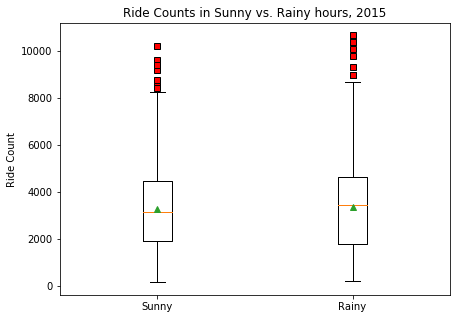

In [22]:

year_2014_df = combined_data_df[combined_data_df['Year']==2014]
year_2015_df = combined_data_df[combined_data_df['Year']==2015]

rain_2015_series = year_2015_df[year_2015_df['rain_1h']>0]['Ride_count']
sunny_2015_series = year_2015_df[year_2015_df['rain_1h']==0]['Ride_count']

data = [sunny_2015_series, rain_2015_series]

labels = ["Sunny", "Rainy"]
# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Rainy hours, 2015")

plt.savefig("Images/Ride_Counts_in_Sunny_vs_Rainy_hours_2015")

plt.show()



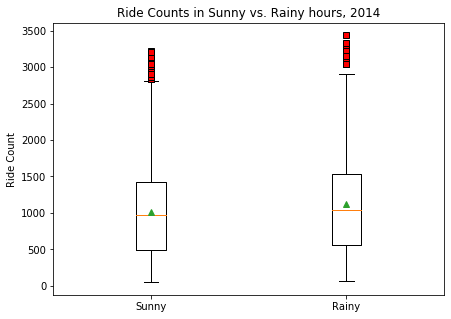

In [23]:
rain_2014_series = year_2014_df[year_2014_df['rain_1h']>0]['Ride_count']

sunny_2014_series = year_2014_df[year_2014_df['rain_1h']==0]['Ride_count']

data = [sunny_2014_series, rain_2014_series]

labels = ["Sunny", "Rainy"]

# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Rainy hours, 2014")

plt.savefig("Images/Ride_Counts_in_Sunny_vs_Rainy_hours_2014")

plt.show()

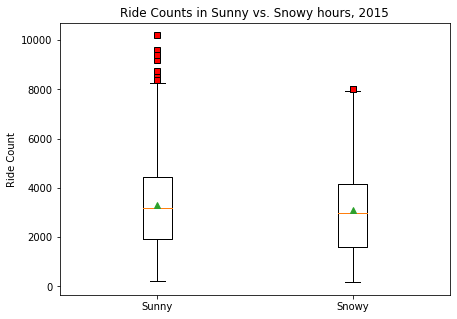

In [24]:
snow_2015_series = year_2015_df[year_2015_df['snow_1h']>0]['Ride_count']
sunny_2015_series = year_2015_df[(year_2015_df['snow_1h']==0) & (year_2015_df['rain_1h']==0)]['Ride_count']

data = [sunny_2015_series, snow_2015_series]

snow_2015_series

labels = ["Sunny", "Snowy"]
# format outliers
red_square = dict(markerfacecolor = 'red', marker='s')

fig, ax = plt.subplots(1,1,figsize=(7,5))

# plot box and whisker plot for each drug on single plot
ax.boxplot(data, labels=labels, flierprops=red_square, showmeans=True)

ax.set_ylabel("Ride Count")

ax.set_title("Ride Counts in Sunny vs. Snowy hours, 2015")

plt.savefig("Images/Ride_Counts_in_Sunny_vs_Snowy_hours_2015")

plt.show()

The r-value is: 0.2747082241478951


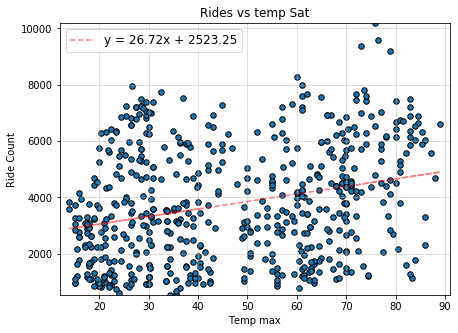

In [25]:
sat_fullday_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 5)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0)] 

plt_scat(sat_fullday_2015['temp_max'], sat_fullday_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Sat')

plt.savefig("Images/Rides_vs_temp_2015")

The r-value is: 0.563244882446643


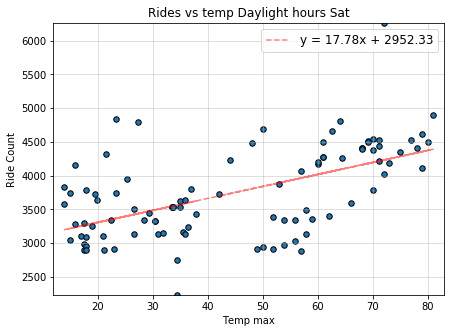

In [26]:
combined_data_df['Time'] = combined_data_df['Time'].astype(int)
sat_day_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 5)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) 
                                    & (combined_data_df['Time'] < 16) 
                                    & (combined_data_df['Time'] > 11)] 

plt_scat(sat_day_2015['temp_max'], sat_day_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours Sat')

plt.savefig("Images/Rides_vs_temp_daylighthours_2015")

In [27]:
wed_fullday_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 2)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0)] 

wed_day_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['Day_of_week'] == 2)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) & (combined_data_df['Time'] < 16) & (combined_data_df['Time'] > 11)] 


The r-value is: 0.29444693733023797


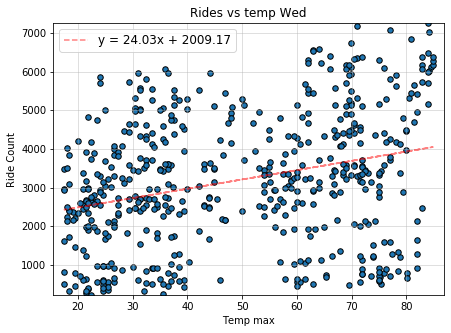

In [28]:
plt_scat(wed_fullday_2015['temp_max'], wed_fullday_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Wed')

plt.savefig("Images/Rides_vs_temp_wed_2015")

The r-value is: 0.674444985878646


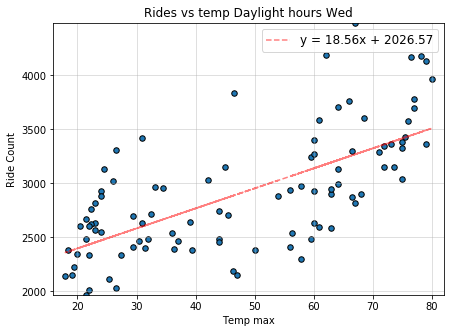

In [29]:
plt_scat(wed_day_2015['temp_max'], wed_day_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours Wed')

plt.savefig("Images/Rides_vs_temp_daylight_2015")

In [30]:
one_pm_2015 = combined_data_df.loc[(combined_data_df['Year'] == 2015)
                                    & (combined_data_df['rain_1h'] == 0.0) 
                                    & (combined_data_df['rain_3h'] == 0.0) 
                                   &(combined_data_df['Time'] == 14)] 



The r-value is: 0.47271177556022004


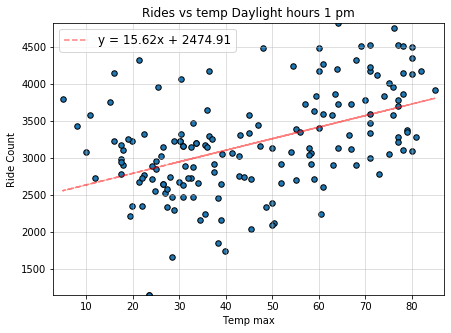

In [31]:
plt_scat(one_pm_2015['temp_max'],one_pm_2015['Ride_count'], "Temp max", 'Ride Count', 'Rides vs temp Daylight hours 1 pm')

plt.savefig("Images/Rides_vs_temp_1pm_2015")